# Baugenehmigungen

Quelle: https://datenadler.de/datasethttps%3A%2F%2Fopendata.potsdam.de%2Fapi%2Fv2%2Fcatalog%2Fdatasets%2Fbaugenehmigungen-in-der-lhp-seit-2005

Lizenz: https://www.dcat-ap.de/def/licenses/20210721#dl-by-de/2.0


Die Frage lautete: Wie viele Baugenehmigungen waren in den jeweiligen Jahren.

In [1]:
#!pip install pyxlsb


In [2]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt 

In [3]:
df = pd.read_csv("csv/baugenehmigungen-in-der-lhp-seit-2005.csv", delimiter=";")
#print(df)

## Statistik zu den Baugenehmigungen

In [4]:
baugenemigungen = df.query('jahr > 0')

## Die Antworten aggregiert nach den vorgegebenen Antwortmöglichkeiten

In [6]:
gruppiert = df.groupby("jahr").agg(
    {"jahr":["count"]}).query('jahr > 0').apply(list)
#print(df)

### Werte aus Dataframe extrahieren

In [7]:
laengen = []
werte = [] 
for index, row in gruppiert.iterrows():
    laengen.append(row['jahr'].name)
    werte.append(row['jahr']['count'])

#print(df)

### Version I

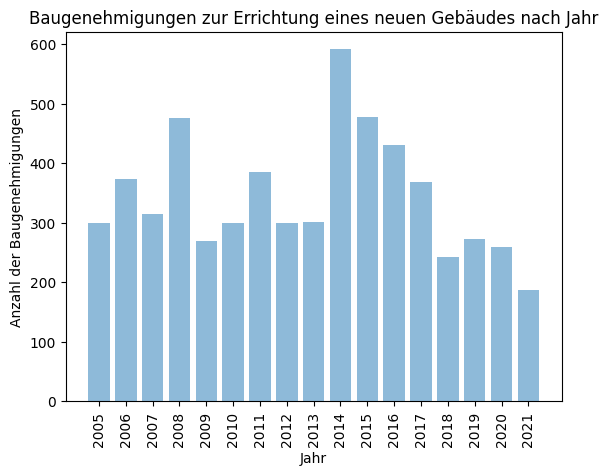

In [8]:
# Daten
jahre = df['jahr']
baugenehmigungen = df['baugenehmigungen_errichtung_eines_neuen_gebaudes']

# Balkendiagramm erstellen
plt.bar(jahre, baugenehmigungen, alpha=0.5)
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Baugenehmigungen')
plt.title('Baugenehmigungen zur Errichtung eines neuen Gebäudes nach Jahr')

# x-Ticks festlegen und y-Ticks entfernen
plt.xticks(jahre, rotation='vertical')  # Hier legen wir die x-Ticks fest und drehen sie vertikal

plt.show()